In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.DataFrame.from_records([
    (2, 0.3806, 0.4307, 0.6330, 0.6672, 0.3824, 0.5665, 0.670944, 0.6043, 0.5632, 0.4877),
    (3, 0.4780, 0.5389, 0.6713, 0.7517, 0.3993, 0.6676, 0.730565, 0.7118, 0.6626, 0.5658),
    (4, 0.5336, 0.6026, 0.7012, 0.7913, 0.4375, 0.7232, 0.780405, 0.7685, 0.71950, 0.6219),
    (5, 0.5879, 0.6540, 0.7409, 0.8104, 0.4238, 0.7326, 0.828282, 0.8092, 0.7157, 0.6416),
    (10, 0.7185, 0.8270, 0.8144, 0.8511, 0.5941, 0.8412, 0.8623, 0.9059, 0.8389, 0.7628)
], columns=['subjects', 'LSTM1', 'LSTM6', 'ConvLSTM1', 'ConvLSTM6', 'ConvLSTMReal1', 'SMPLLSTM', 'ConvLSTMAug', 'ConvLSTM1D', 'SMPLConvLSTM1D', '1ConvLSTM1D'])
confints = pd.DataFrame.from_records([
    (2, 0.0848, 0.0405, 0.0583, 0.0488, 0.0656, 0.0495, 0.1078, 0.0674, 0.0659, 0.0408),
    (3, 0.0630, 0.0380, 0.0630, 0.0588, 0.0716, 0.0540, 0.0802, 0.0463, 0.0718, 0.0480),
    (4, 0.0312, 0.0359, 0.0560, 0.0730, 0.0803, 0.0668, 0.0525, 0.0416, 0.0535, 0.0503),
    (5, 0.0219, 0.0404, 0.0827, 0.0425, 0.0797, 0.0389, 0.0095, 0.0673, 0.0480, 0.0718),
    (10, 0.1657, 0.0486, 0.0831, 0.0627, 0.1288, 0.0402, 0.0517, 0.0309, 0.0448, 0.0565)
], columns=['subjects', 'ConvLSTM6', 'LSTM6', 'ConvLSTM1', 'LSTM1', 'ConvLSTMReal1', 'SMPLLSTM', 'ConvLSTMAug', 'ConvLSTM1D', 'SMPLConvLSTM1D', '1ConvLSTM1D'])

In [15]:
df['ConvLSTMAug'].iloc[-1], confints['ConvLSTMAug'].iloc[-1]

(0.8623, 0.0517)

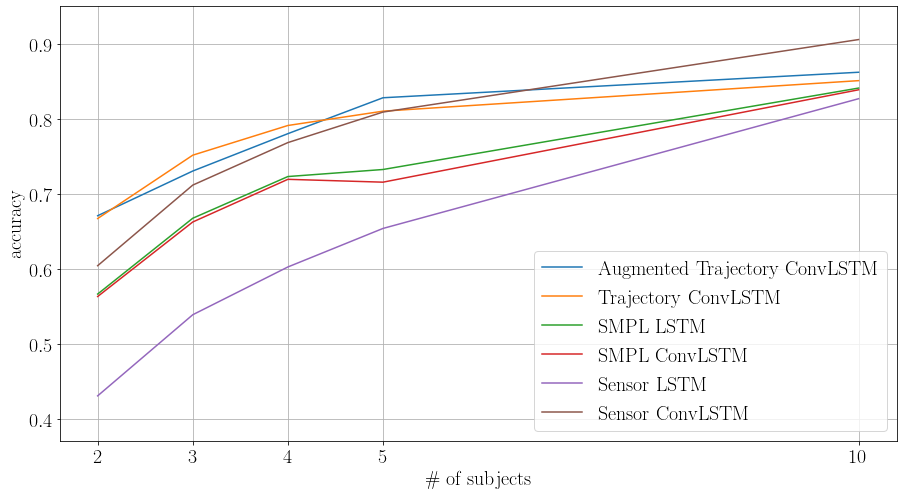

In [5]:
rc('text', usetex=True)
rc('font', size=20, family='serif')
f = plt.figure(figsize=(15, 8))
ax = plt.subplot()
#plt.errorbar(df['subjects'], df['ConvLSTMAug'], yerr=confints['ConvLSTMAug'] / 2, label="Augmented Trajectory ConvLSTM", capsize=6)
#plt.errorbar(df['subjects'], df['ConvLSTM6'], yerr=confints['ConvLSTM6'] / 2, label="Trajectory ConvLSTM", capsize=6)
#plt.errorbar(df['subjects'], df['SMPLLSTM'], yerr=confints['SMPLLSTM'] / 2, label="SMPL LSTM", capsize=6)
#plt.errorbar(df['subjects'], df['SMPLConvLSTM1D'], yerr=confints['SMPLConvLSTM1D'] / 2, label="SMPL ConvLSTM", capsize=6)
#plt.errorbar(df['subjects'], df['LSTM6'], yerr=confints['LSTM6'] / 2, label="Sensor LSTM", capsize=6)
#plt.errorbar(df['subjects'], df['ConvLSTM1D'], yerr=confints['ConvLSTM1D'] / 2, label="Sensor ConvLSTM", capsize=6)

plt.plot(df['subjects'], df['ConvLSTMAug'], label="Augmented Trajectory ConvLSTM")
plt.plot(df['subjects'], df['ConvLSTM6'], label="Trajectory ConvLSTM")
plt.plot(df['subjects'], df['SMPLLSTM'], label="SMPL LSTM")
plt.plot(df['subjects'], df['SMPLConvLSTM1D'], label="SMPL ConvLSTM")
plt.plot(df['subjects'], df['LSTM6'], label="Sensor LSTM")
plt.plot(df['subjects'], df['ConvLSTM1D'], label="Sensor ConvLSTM")
plt.ylim(0.37, 0.95)
plt.grid(True)
ax.xaxis.set_ticks([2, 3, 4, 5, 10])
plt.legend(loc="best")
plt.xlabel("\# of subjects")
plt.ylabel("accuracy")
plt.show()
f.savefig("plot_all.pdf", bbox_inches='tight')

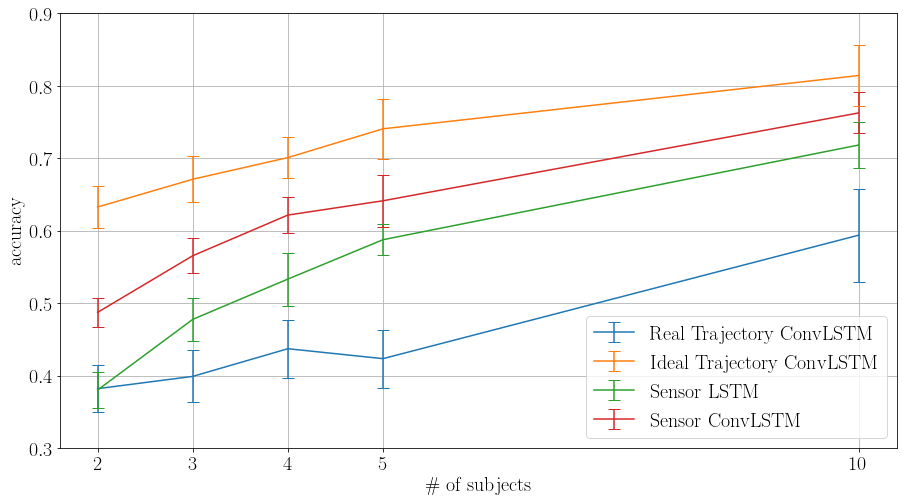

In [4]:
f = plt.figure(figsize=(15, 8))
ax = plt.subplot()
plt.errorbar(df['subjects'], df['ConvLSTMReal1'], yerr=confints['ConvLSTMReal1'] / 2, label="Real Trajectory ConvLSTM", capsize=6)
plt.errorbar(df['subjects'], df['ConvLSTM1'], yerr=confints['ConvLSTM1'] / 2, label="Ideal Trajectory ConvLSTM", capsize=6)
plt.errorbar(df['subjects'], df['LSTM1'], yerr=confints['LSTM1'] / 2, label="Sensor LSTM", capsize=6)
plt.errorbar(df['subjects'], df['1ConvLSTM1D'], yerr=confints['1ConvLSTM1D'] / 2, label="Sensor ConvLSTM", capsize=6)
plt.ylim(0.3, 0.9)
plt.grid(True)
ax.xaxis.set_ticks([2, 3, 4, 5, 10])
plt.legend(loc="best")
plt.xlabel("\# of subjects")
plt.ylabel("accuracy")
plt.show()
f.savefig("plot_single.pdf", bbox_inches='tight')

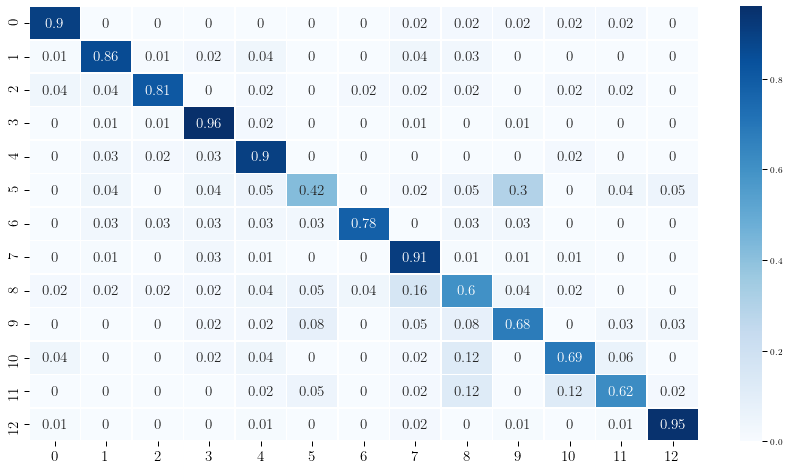

Accuracy: 0.8187633262260128
Accuracy: 0.7741935483870966


In [5]:
confs = np.array([[[ 8, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [ 1, 19, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 2, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
 [ 0, 0, 0,37, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 2, 9, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1],
 [ 0, 0, 0, 1, 0, 0, 6, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 2, 0, 0, 0,13, 0, 0, 0, 0, 0],
 [ 0, 1, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0], 
 [ 0, 0, 0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0],
 [ 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 5, 0, 0],
 [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0],
 [ 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 13]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0,12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0,14, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [ 0, 0, 0,12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0], 
 [ 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 1, 0, 0, 5, 1, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0], 
 [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,13]],
[[ 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [ 0,10, 1, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0],
 [ 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [ 0, 0, 0,18, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 1, 0],
 [ 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 0, 1, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,15]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [ 0, 7, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [ 0, 0, 0,12, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 1, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 1, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,13]],
[[ 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [ 0, 8, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 1, 0,12, 1, 0, 0, 0, 0, 1, 0, 0, 0],
 [ 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 1, 0, 0, 0, 0, 0, 6, 0, 1, 0, 0, 0],
 [ 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0],
 [ 0, 0, 0, 0, 1, 1, 0, 2, 0, 3, 0, 0, 0],
 [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0],
 [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,13]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [ 0,11, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0,14, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0,10, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 2, 5, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 5, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,10]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0,12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 1, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 0],
 [ 0, 1, 0, 0, 1, 5, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 1, 0, 0, 8, 1, 0, 1, 0, 0],
 [ 1, 0, 0, 0, 1, 0, 0, 0, 5, 0, 1, 0, 0],
 [ 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2],
 [ 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 0],
 [ 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,13]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0,14, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 3, 0, 0, 1, 3, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,11]],
[[ 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 7, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
 [ 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [ 0, 0, 0,12, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 1, 1, 4, 0, 0, 0, 1, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0],
 [ 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,10]]])
labels = ['arm chest crossings', 'arm circles', 'arm head crossings', 'arm raises', 'arm stretches up', 'cross stepping', 'jumping jacks', 'leg raises', 'lunges', 'side stepping', 'squats', 'sumo squats', 'walking']
labels = np.arange(len(labels))
abs_mat = np.sum(confs, axis=0)
matrix = np.round(abs_mat/abs_mat.sum(axis=1)[:,None], 2)
f = plt.figure(figsize=(15, 8))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
b = sns.heatmap(matrix, annot=True, linewidths=.5, cmap="Blues", xticklabels=labels, yticklabels=labels)
b.tick_params(labelsize=15)
plt.show()
print('Accuracy:', np.sum(np.diag(abs_mat))/np.sum(abs_mat))
print('Accuracy:', np.sum(np.diag(matrix))/np.sum(matrix))
f.savefig("confmat_lstm.pdf", bbox_inches='tight')

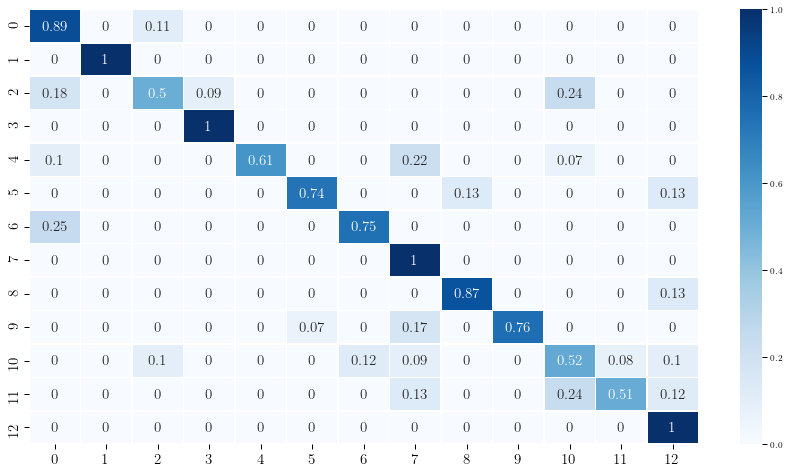

Accuracy: 0.8504109589041096
Accuracy: 0.7795698924731184


In [6]:
confs = np.array([[[18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 42, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 28, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32]],
[[ 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
[[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0],
 [ 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28]],
[[12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 35, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0],
 [ 0, 0, 0, 38, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0],
 [ 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30]],
[[ 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26]],
[[ 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26]],
[[ 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21]],
[[ 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0],
 [ 0, 0, 0, 34, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14],
 [ 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 21, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 27]],
[[ 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22]],
[[ 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 24, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [ 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0],
 [ 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0],
 [ 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20]]])
labels = ['arm chest crossings', 'arm circles', 'arm head crossings', 'arm raises', 'arm stretches up', 'cross stepping', 'jumping jacks', 'leg raises', 'lunges', 'side stepping', 'squats', 'sumo squats', 'walking']
labels = np.arange(len(labels))
abs_mat = np.sum(confs, axis=0)
matrix = np.round(abs_mat/abs_mat.sum(axis=1)[:,None], 2)
f = plt.figure(figsize=(15, 8))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
b = sns.heatmap(matrix, annot=True, linewidths=.5, cmap="Blues", xticklabels=labels, yticklabels=labels)
b.tick_params(labelsize=15)
plt.show()
print('Accuracy:', np.sum(np.diag(abs_mat))/np.sum(abs_mat))
print('Accuracy:', np.sum(np.diag(matrix))/np.sum(matrix))
f.savefig("confmat_convlstm.pdf", bbox_inches='tight')

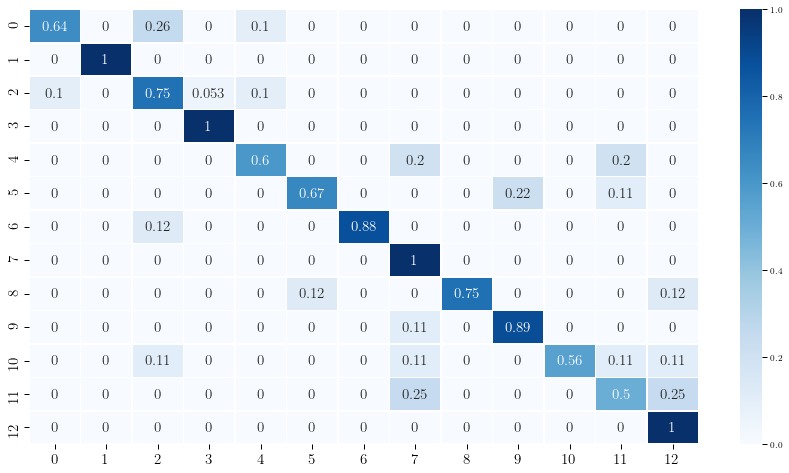

Accuracy: 0.8504109589041096
Accuracy: 0.7867395676219205


In [7]:
from io import StringIO
matrix = np.genfromtxt(StringIO("""0.644444444444444	0	0.255555555555556	0	0.1	0	0	0	0	0	0	0	0
0	1	0	0	0	0	0	0	0	0	0	0	0
0.1	0	0.747058823529412	0.052941176470588	0.1	0	0	0	0	0	0	0	0
0	0	0	1	0	0	0	0	0	0	0	0	0
0	0	0	0	0.6	0	0	0.2	0	0	0	0.2	0
0	0	0	0	0	0.666666666666667	0	0	0	0.222222222222222	0	0.111111111111111	0
0	0	0.125	0	0	0	0.875	0	0	0	0	0	0
0	0	0	0	0	0	0	1	0	0	0	0	0
0	0	0	0	0	0.125	0	0	0.75	0	0	0	0.125
0	0	0	0	0	0	0	0.111111111111111	0	0.888888888888889	0	0	0
0	0	0.111111111111111	0	0	0	0	0.111111111111111	0	0	0.555555555555556	0.111111111111111	0.111111111111111
0	0	0	0	0	0	0	0.25	0	0	0	0.5	0.25
0	0	0	0	0	0	0	0	0	0	0	0	1"""), delimiter="	")
labels = ['arm chest crossings', 'arm circles', 'arm head crossings', 'arm raises', 'arm stretches up', 'cross stepping', 'jumping jacks', 'leg raises', 'lunges', 'side stepping', 'squats', 'sumo squats', 'walking']
labels = np.arange(len(labels))
f = plt.figure(figsize=(15, 8))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
b = sns.heatmap(matrix, annot=True, linewidths=.5, cmap="Blues", xticklabels=labels, yticklabels=labels)
b.tick_params(labelsize=15)
plt.show()
print('Accuracy:', np.sum(np.diag(abs_mat))/np.sum(abs_mat))
print('Accuracy:', np.sum(np.diag(matrix))/np.sum(matrix))
f.savefig("confmat_convlstm.pdf", bbox_inches='tight')

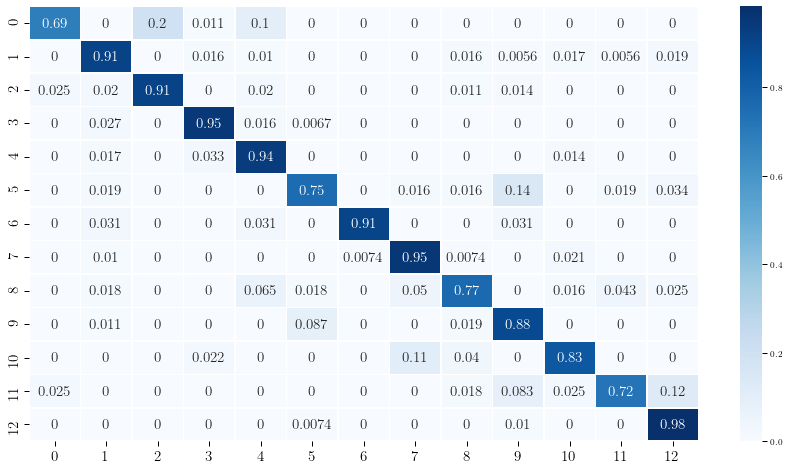

Accuracy: 0.8504109589041096
Accuracy: 0.8612502119810407


In [8]:
from io import StringIO
matrix = np.genfromtxt(StringIO("""0.688888888888889	0	0.2	0.011111111111111	0.1	0	0	0	0	0	0	0	0
0	0.911565656565657	0	0.015555555555556	0.01	0	0	0	0.015656565656566	0.005555555555556	0.016666666666667	0.005555555555556	0.019444444444445
0.025	0.02	0.909603174603175	0	0.02	0	0	0	0.011111111111111	0.014285714285714	0	0	0
0	0.026530126220529	0	0.950525843776618	0.016277363336187	0.006666666666667	0	0	0	0	0	0	0
0	0.016666666666667	0	0.033333333333333	0.935714285714286	0	0	0	0	0	0.014285714285714	0	0
0	0.018518518518519	0	0	0	0.753968253968254	0	0.015873015873016	0.015873015873016	0.142857142857143	0	0.018518518518519	0.034391534391534
0	0.03125	0	0	0.03125	0	0.90625	0	0	0.03125	0	0	0
0	0.01010101010101	0	0	0	0	0.007407407407407	0.953872053872054	0.007407407407407	0	0.021212121212121	0	0
0	0.017857142857143	0	0	0.064732142857143	0.017857142857143	0	0.05	0.766071428571429	0	0.015625	0.042857142857143	0.025
0	0.011111111111111	0	0	0	0.086507936507937	0	0	0.018518518518519	0.883862433862434	0	0	0
0	0	0	0.022222222222222	0	0	0	0.108024691358025	0.040123456790124	0	0.82962962962963	0	0
0.025	0	0	0	0	0	0	0	0.017857142857143	0.083333333333333	0.025	0.723809523809524	0.125
0	0	0	0	0	0.007407407407407	0	0	0	0.01010101010101	0	0	0.982491582491582
"""), delimiter="	")
labels = ['arm chest crossings', 'arm circles', 'arm head crossings', 'arm raises', 'arm stretches up', 'cross stepping', 'jumping jacks', 'leg raises', 'lunges', 'side stepping', 'squats', 'sumo squats', 'walking']
labels = np.arange(len(labels))
f = plt.figure(figsize=(15, 8))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":15})
b = sns.heatmap(matrix, annot=True, linewidths=.5, cmap="Blues", xticklabels=labels, yticklabels=labels)
b.tick_params(labelsize=15)
plt.show()
print('Accuracy:', np.sum(np.diag(abs_mat))/np.sum(abs_mat))
print('Accuracy:', np.sum(np.diag(matrix))/np.sum(matrix))
f.savefig("confmat_convlstm_1d.pdf", bbox_inches='tight')

arm raises
lunges
arm circles
arm stretches up
arm head crossings
cross stepping
walking
leg raises
arm chest crossings
squats
sumos
jumping jacks
side stepping


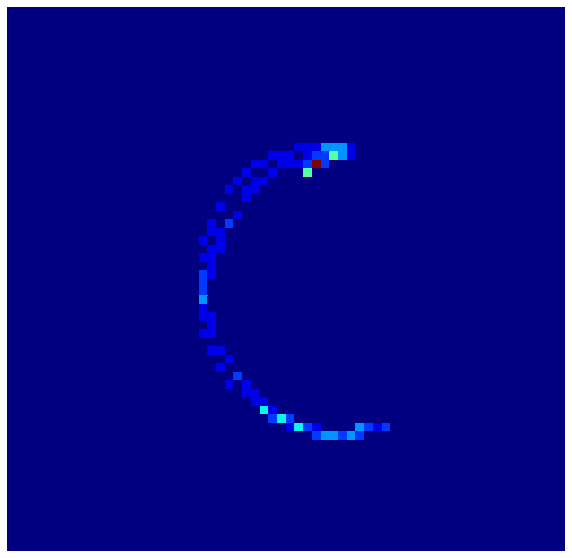

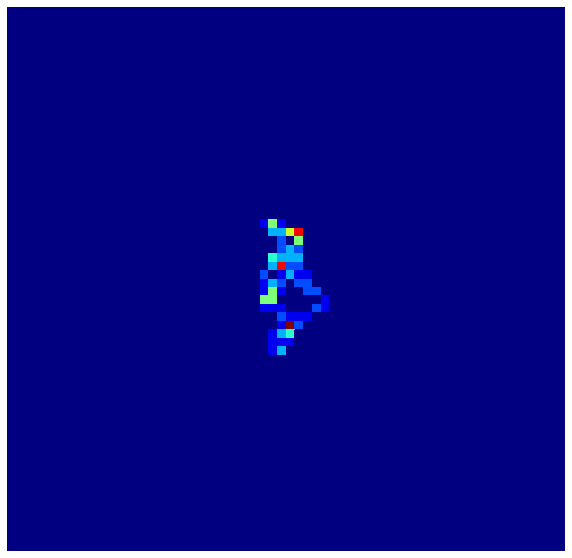

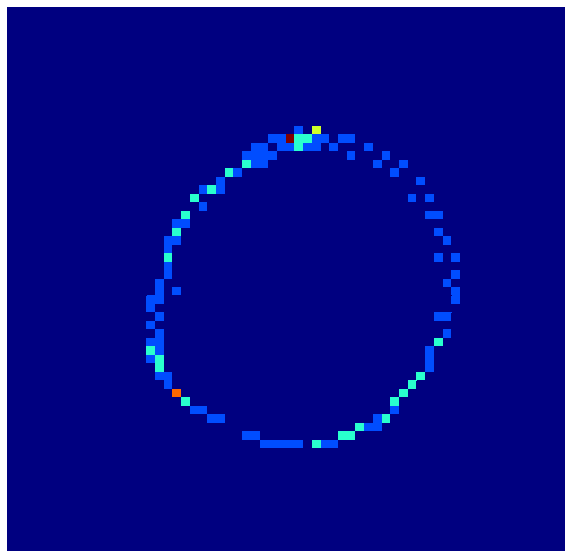

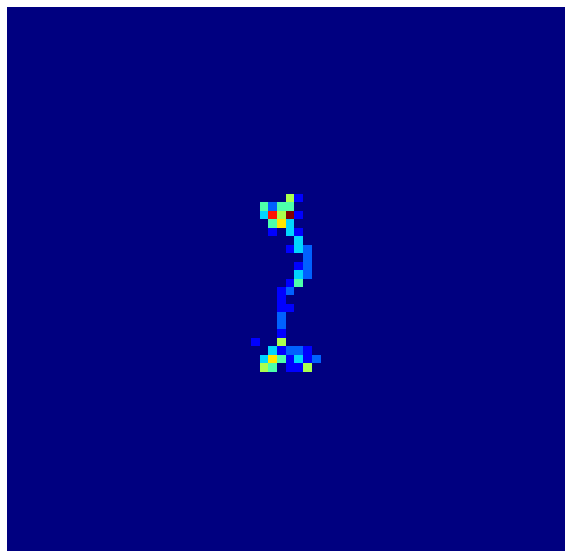

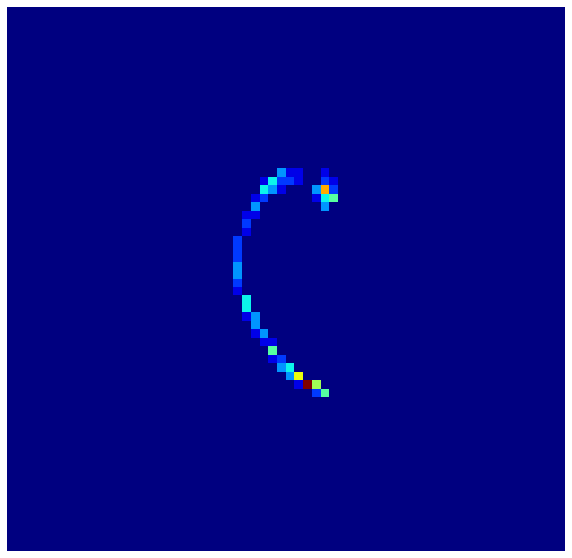

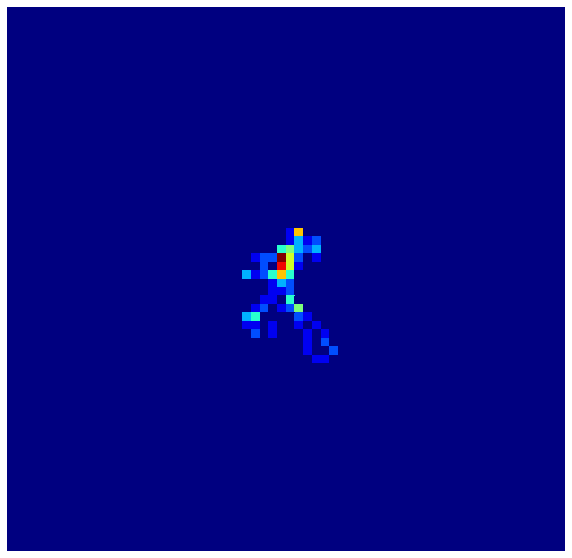

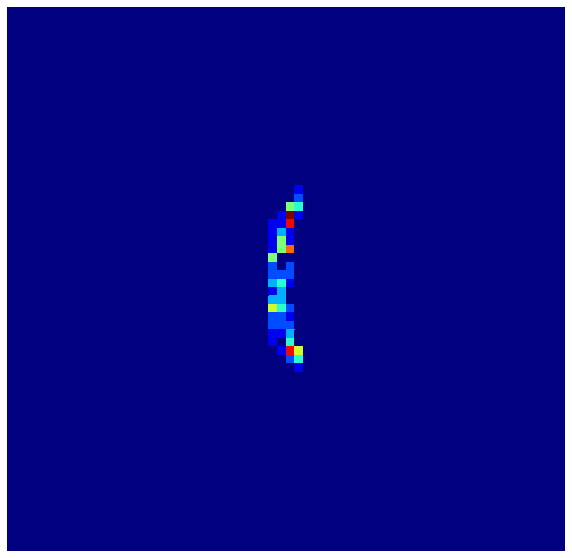

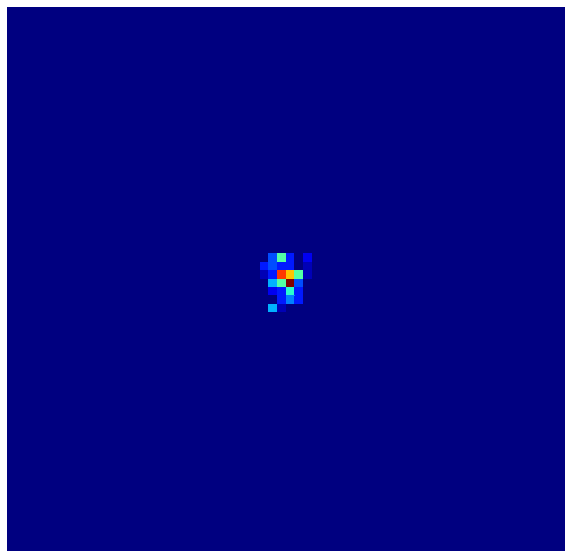

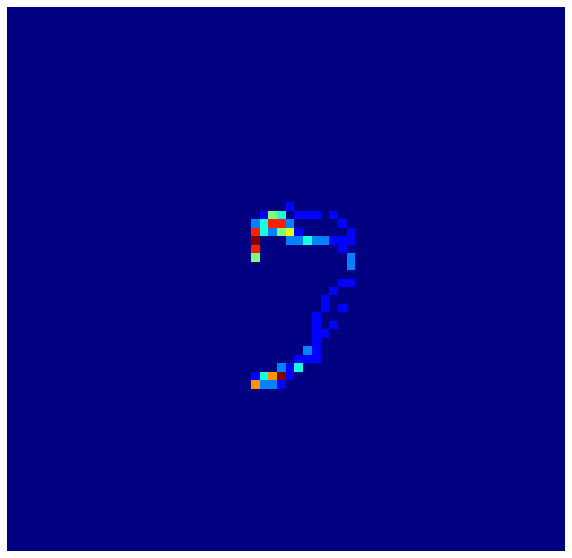

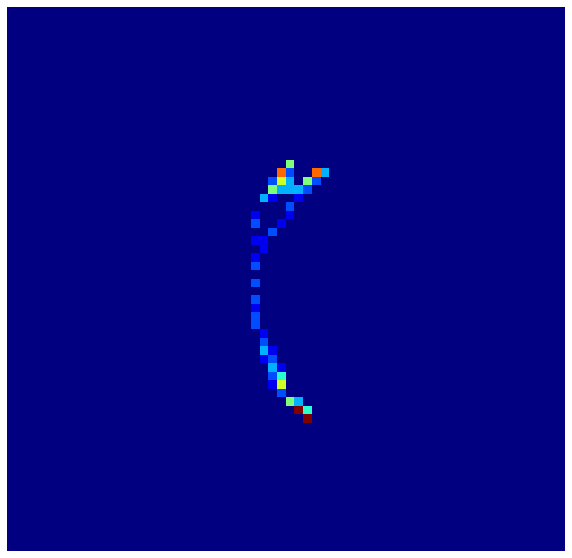

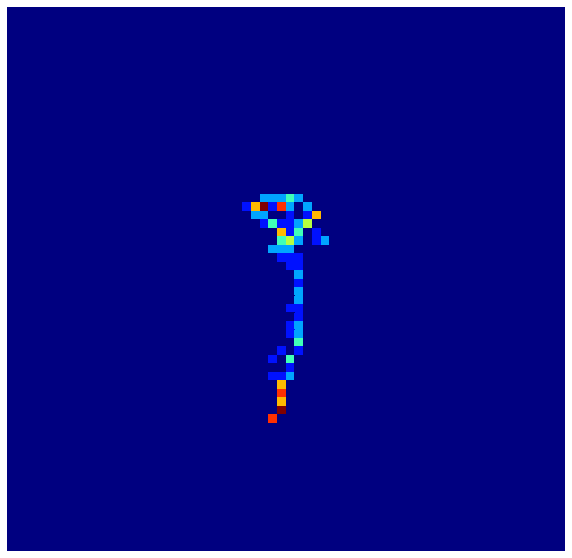

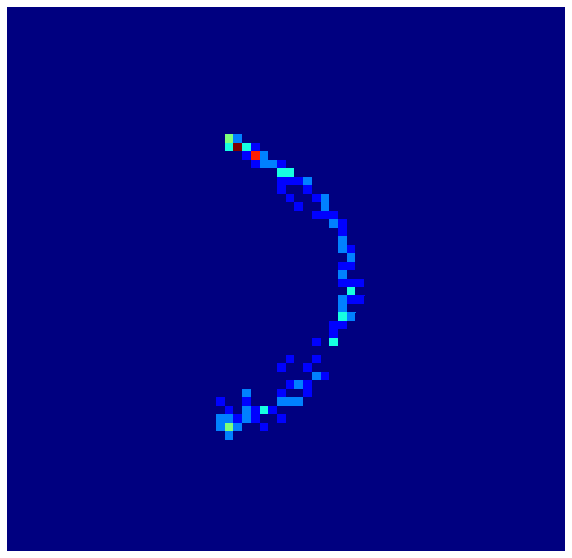

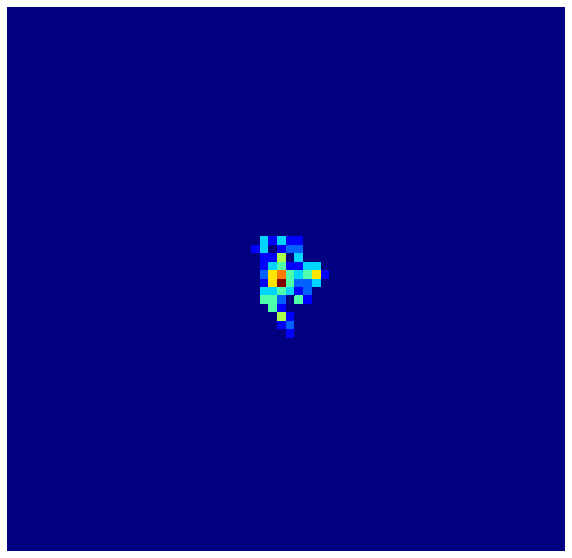

In [37]:
#Right Wrist for each activity
import seaborn as sns; sns.set()
activities = dict(np.load('images.npz', allow_pickle=True))
for key, image in activities.items():
    print(key)
    f = plt.figure(figsize=(10,10))
    sns.heatmap(image, cmap='jet', cbar=False)
    ax = plt.gca()
    ax.set(xticklabels=[], yticklabels=[])
    plt.show()
    f.savefig(f"{key}.pdf", bbox_inches='tight')

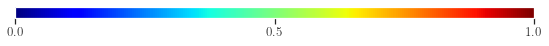

In [62]:
from matplotlib.ticker import FixedFormatter
fig = plt.figure(figsize=(8,1))
#fig.tight_layout(rect=[0, 0, .9, 1])
cbar_ax = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.jet, norm=mpl.colors.Normalize(vmin=0, vmax=1), orientation='horizontal', ticks=np.array([0.0, 0.5, 1.0]))
cb1.ax.tick_params(labelsize=13)
fig.savefig("color_legend.pdf", bbox_inches="tight")

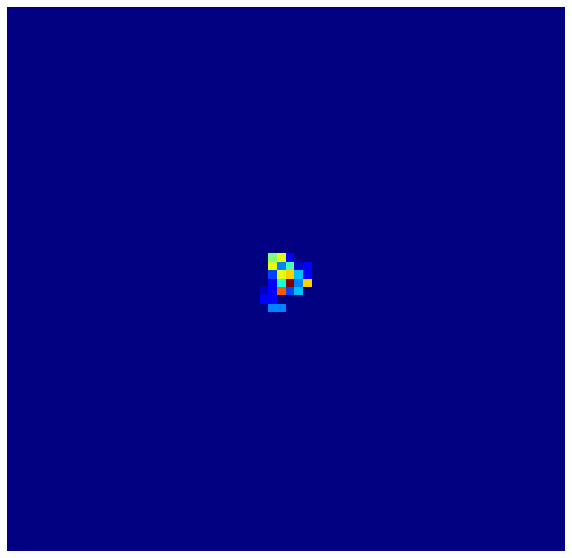

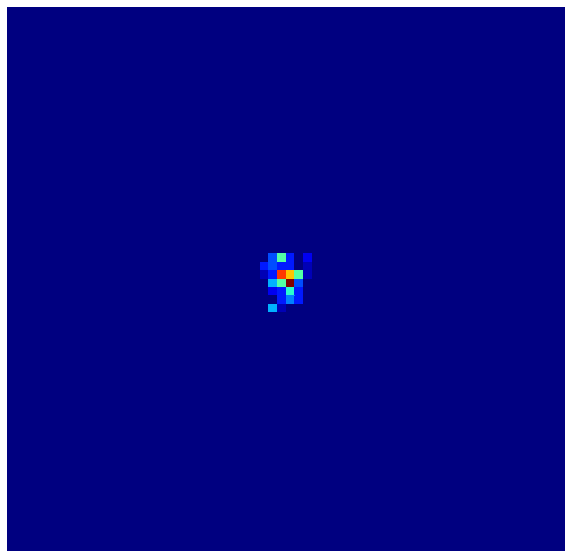

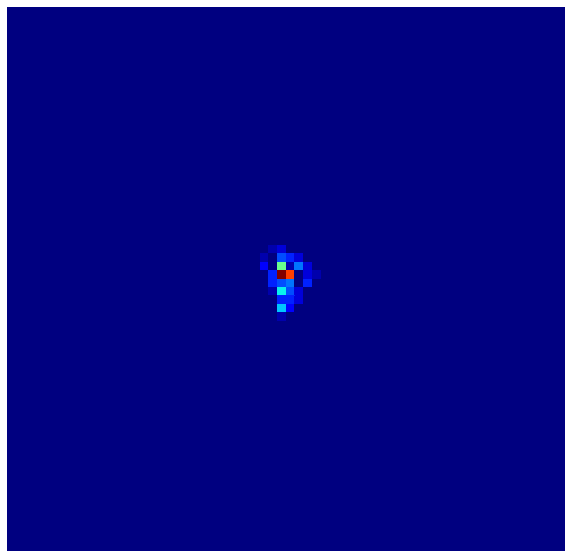

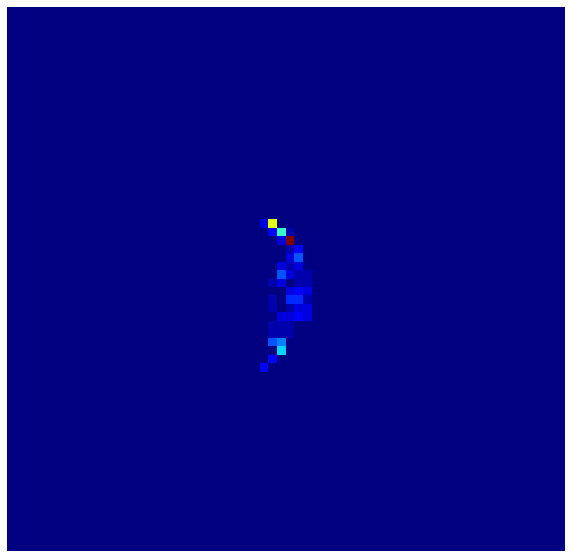

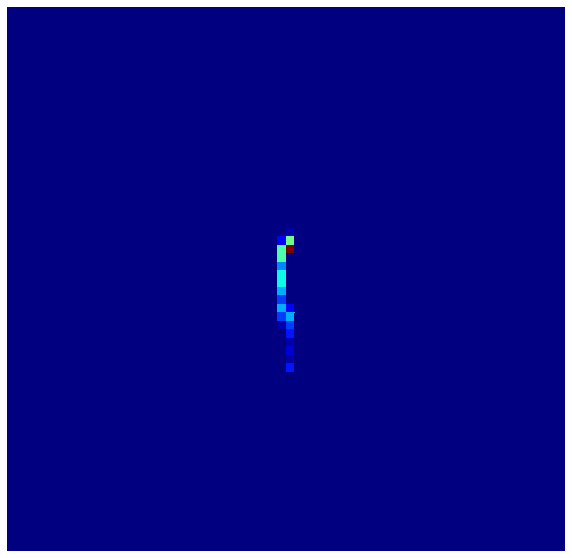

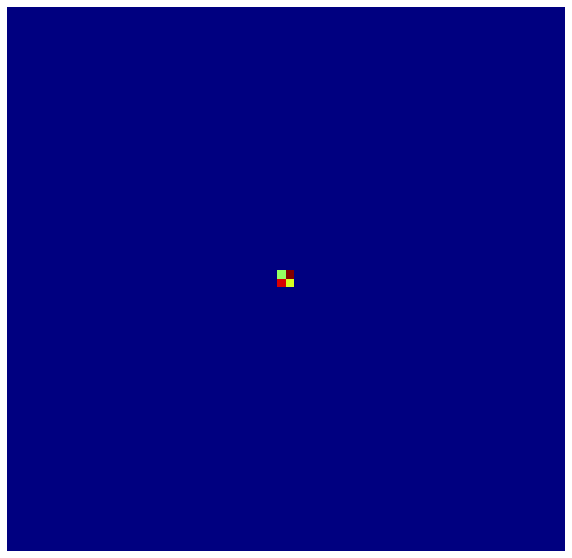

In [38]:
#Leg Raises for each sensor, in order of left wrist, right wrist, left knee, right knee, head, spine base
sensors = ['left wrist', 'right wrist', 'left knee', 'right knee', 'head', 'spine']
raises = np.load('image.npz', allow_pickle=True)['arr_0'].tolist()['leg raises']
for i in range(len(raises)):
    f = plt.figure(figsize=(10,10))
    sns.heatmap(raises[i], cmap='jet', cbar=False)
    ax = plt.gca()
    ax.set(xticklabels=[], yticklabels=[])
    plt.show()
    f.savefig(f"{sensors[i]}.pdf", bbox_inches='tight')